# Exploratory analysis substations

### Libraties and data source

In [9]:
# import libraries
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import time as tm
import pylab
#import Orange as Or

# plotting
import matplotlib.pyplot as plt


## Data Frame Basic

In [2]:
dataDir = ("C:/Users/miha/Desktop/Programming/test1/")
df = pd.read_csv(dataDir + "zigbee1.csv", parse_dates = True)
#df.head()


### Merge dataframes zigbee1 & zigbee2

In [10]:
# Loading first file dataframe as df1
dataDir = ("C:/Users/miha/Desktop/Programming/test1/")
df1 = pd.read_csv(dataDir + r"zigbee1.csv")

# Loading second file dataframe as df2
dataDir = ("C:/Users/miha/Desktop/Programming/test1/")
df2 = pd.read_csv(dataDir + r"zigbee2.csv")

#convert epoch time to datetime
df2.index = pd.to_datetime(df2['Timestamp'], unit='s')
df2.index.day

df1.index = pd.to_datetime(df1['Timestamp'], unit='s')
df1.index.day

#Meriging dataframes by timestamp (index)
df3=pd.concat([df1,df2], axis=1)

#rename columns
df3.rename(columns={'ch0_zigbee1': 'voltage', 'ch1_zigbee1': 'current1', 'ch0_zigbee2': 'current2', 'ch1_zigbee2': 'current3'}, inplace=True)

##Add new derivatives (Power1,2,3,)
df3['PW1'] = df3['voltage'] * df3['current1']
df3['PW2'] = df3['voltage'] * df3['current2']
df3['PW3'] = df3['voltage'] * df3['current3']

## resampling df
idx = pd.date_range(start=df3.index.min(),end=df3.index.max(), freq="1s")
df = df3.reindex(idx)
# delete timestamp colums
df.drop("Timestamp", 1, inplace=True)


#Adding Time tags
#df['month'] = df.index.month
#df['day'] = df.index.dayofweek
#df['hour'] = df.index.hour
#df['min'] = df.index.minute
#df['sec'] = df.index.second




In [5]:
#df


## Missing values

In [ ]:
# missing values
# TO - DO:
#get missing data for all chanels (from merged dataframes)
#get all missing data periodes (for each chanel)
#get a list of 5 longest missing data periodes
#plot a histogram of missing periodes
#explain how do we handle missing data

#Sampling rate:
#resample entire dataframe (for example on 10s, 30s, 60s), using mean value aggreate
#plot original timeseries nad resampled timeserieses on the same graph
#check how much data accuracy do we lose by resampling
#explain which resampling freq did we chose


### Counting Missing values

In [36]:
# counting, dostribution of missing values,
# methods for substitution (last value) - fillna 
# testing effect of different methods on simulated missing values (reducing 10% of measurements)
a=df["voltage"]
d1=a.isnull().sum()/len(df)
b=df["current1"]
d2=b.isnull().sum()/len(df)
c=df["current2"]
d3=c.isnull().sum()/len(df)
d=df["current3"].isnull()
d4=d.isnull().sum()/len(df)

print (d1)
print (d2)
print (d3)
print (d4)

0.23744095189603012
0.24404777054350774
0.23624715752241884
0.0


In [34]:
#transofrmacija - postavi 0 kjer je vrednost in 1 kjer ne NaN
dfN=df.isnull().astype(int)

#plot missing values 
dfN[["voltage","current3", 'PW1']]["2017-12-03 16:30:00":"2017-12-03 16:50:00" ]



,voltage,current3,PW1
2017-12-03 16:30:00,0,0,1
2017-12-03 16:30:01,0,0,0
2017-12-03 16:30:02,0,0,0
2017-12-03 16:30:03,0,0,0
2017-12-03 16:30:04,0,0,1
2017-12-03 16:30:05,0,0,0
2017-12-03 16:30:06,0,0,0
2017-12-03 16:30:07,0,0,0
2017-12-03 16:30:08,0,1,0
2017-12-03 16:30:09,0,1,0


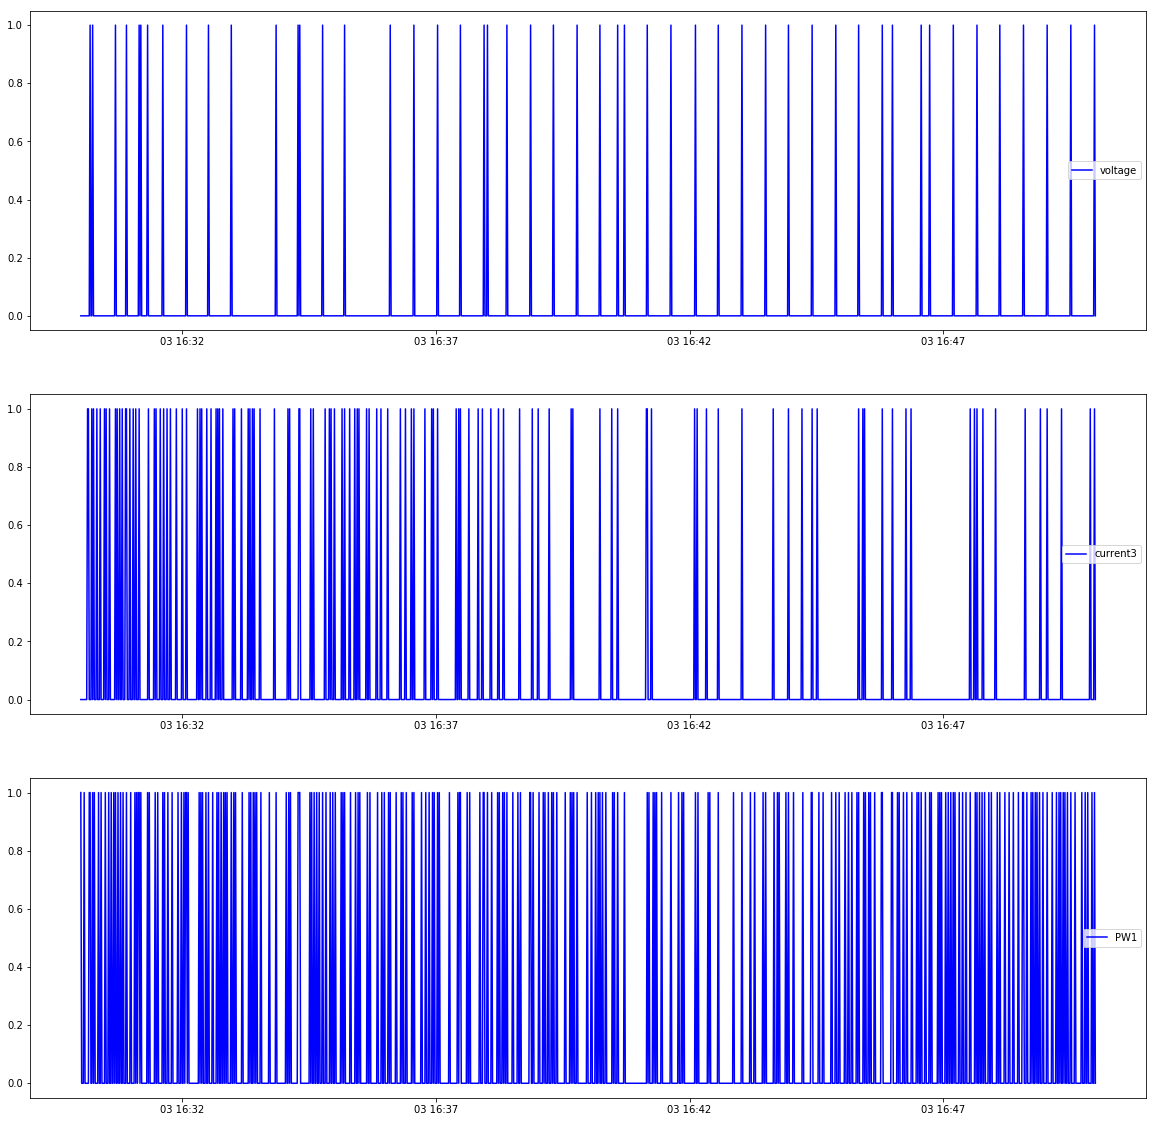

In [35]:
_ = dfN[["voltage","current3", 'PW1']]["2017-12-03 16:30:00":"2017-12-03 16:50:00" ].plot(subplots=True, layout=(3,1), style=['b','b','b'], 
                                                       figsize=(20,20), x_compat=True, sharex=False) 

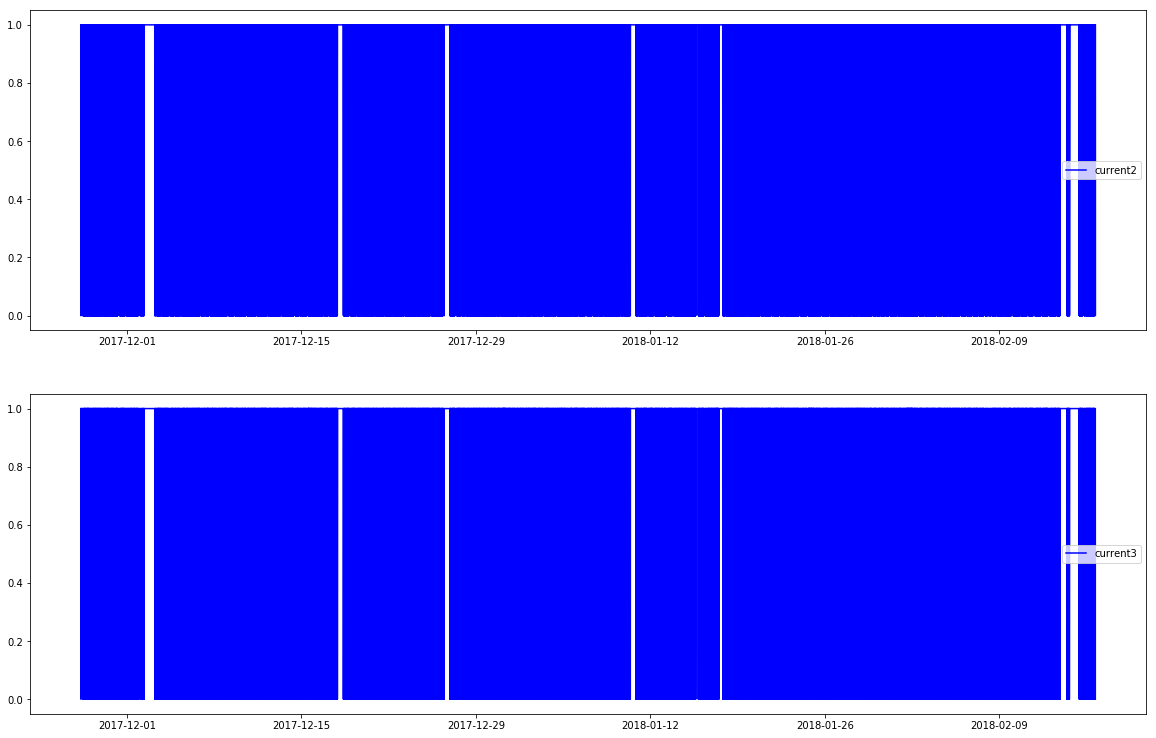

In [13]:
#a.hist()
#b.hist()
#c.hist()
#d.hist()
_ = dfN[["current2","current3"]].plot(subplots=True, layout=(3,1), style=['b','b','b'], 
                                                       figsize=(20,20), x_compat=True, sharex=False) 




In [47]:

#hystogram of NaN 
dfN = df.isnull()
df.replace("pd.NaN",1,inplace=True)
#colums= ["voltage", "current1", "current2", "current3"]

a=df["current1"].isnull()
d4=a.isnull().sum()/len(df)
b=len(a)
 
for i in range(b)
print i
#a[i].isnull()
# if a[i].isnull() = True 
#    a[i].replace(a[i], 1, inplace=True)
#    else a[i]= a[i]
    

#for element in col:
#    df.drop(element, 1, inplace=True)
    
#for i in range(21, 41):
#    df.drop("CH" + str(i), 1, inplace=True)
#a.plt.hist([np.nan])




SyntaxError: invalid syntax (<ipython-input-47-20fa882b3064>, line 11)

In [ ]:
## Counting Missing values

In [41]:
b

7033037

## voltage overview

## Plots

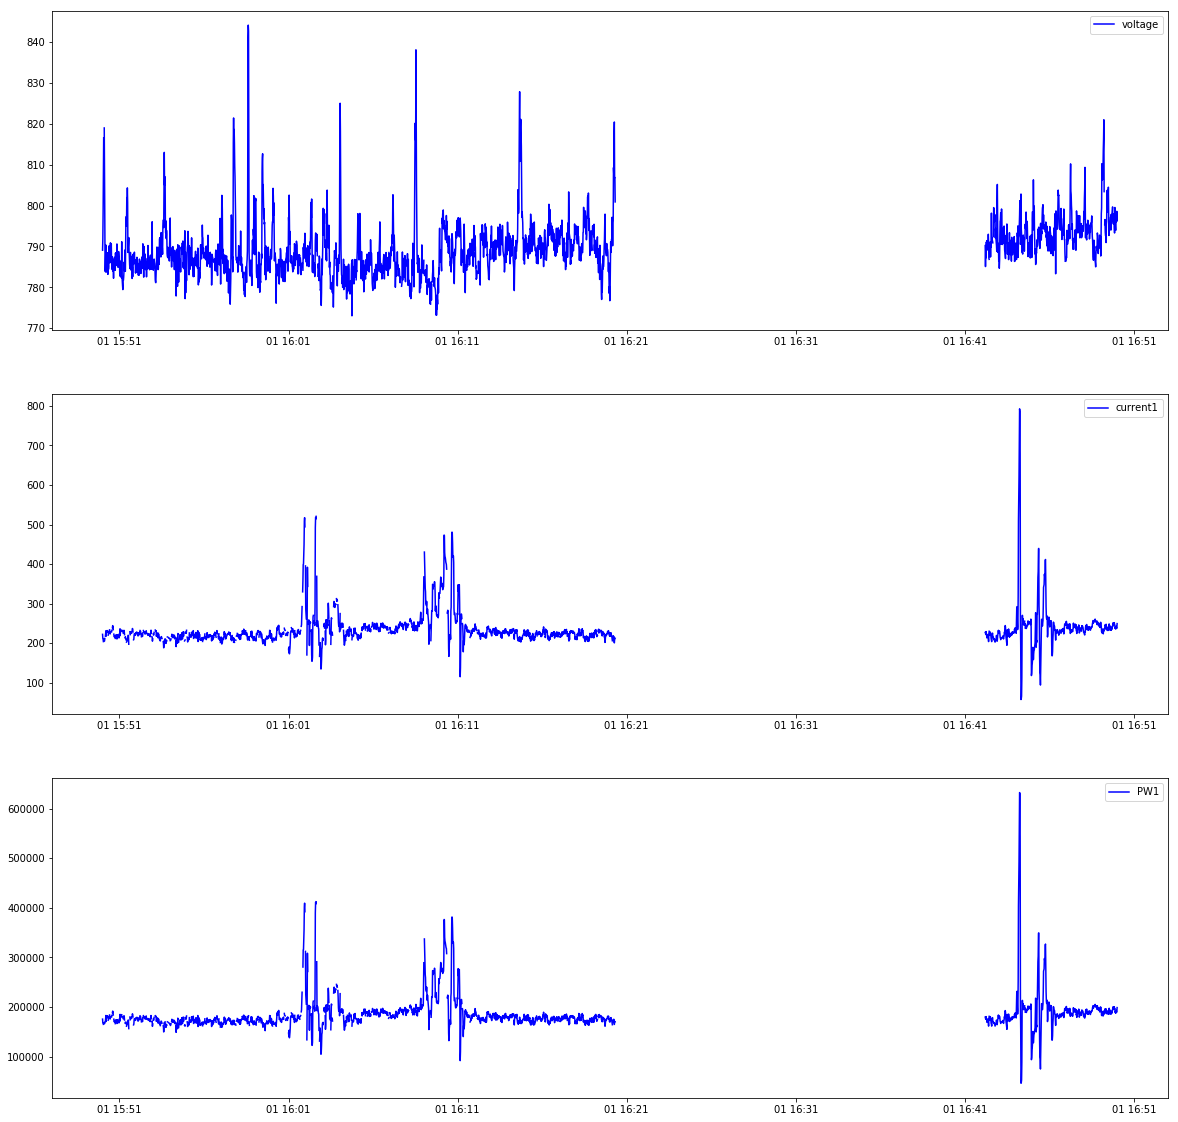

In [97]:
_ = df[["voltage","current1", 'PW1']]["2017-12-01 15:50:00":"2017-12-01 16:50:00" ].plot(subplots=True, layout=(3,1), style=['b','b','b'], 
                                                       figsize=(20,20), x_compat=True, sharex=False)     

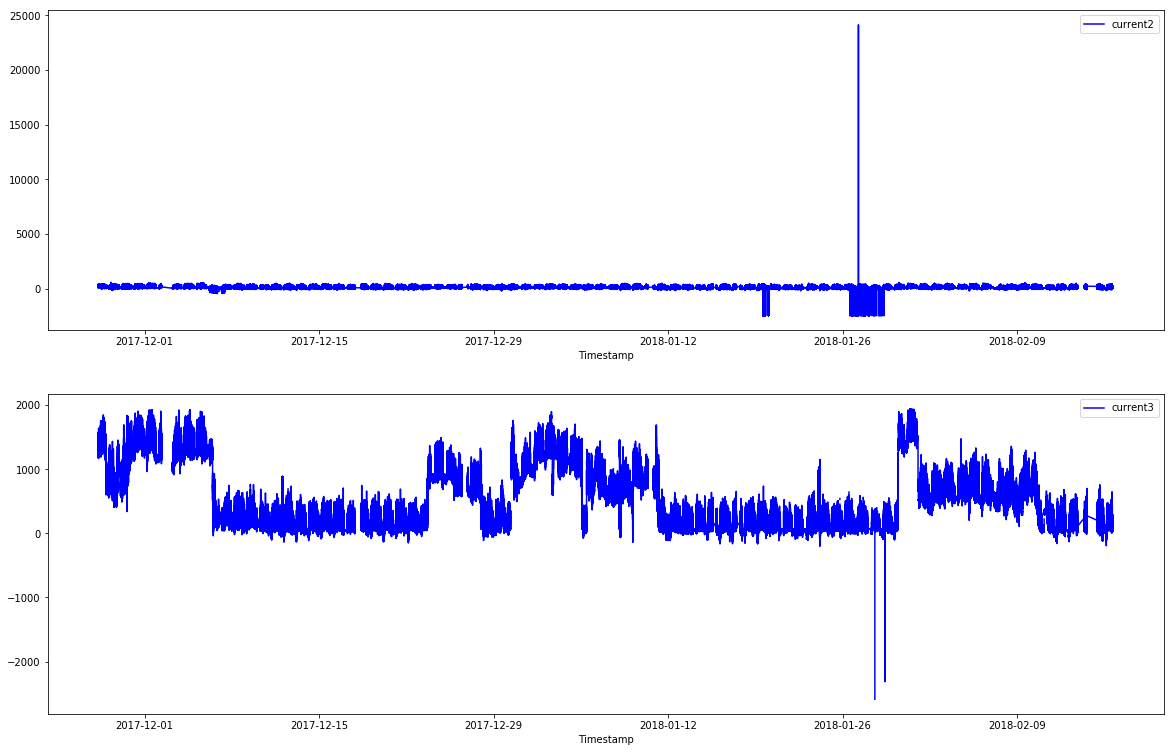

In [12]:
##plot current2 & current#3
_ = df2[["current2","current3"]].plot(subplots=True, layout=(3,1), style=['b','b','b'], 
                                                       figsize=(20,20), x_compat=True, sharex=False) 

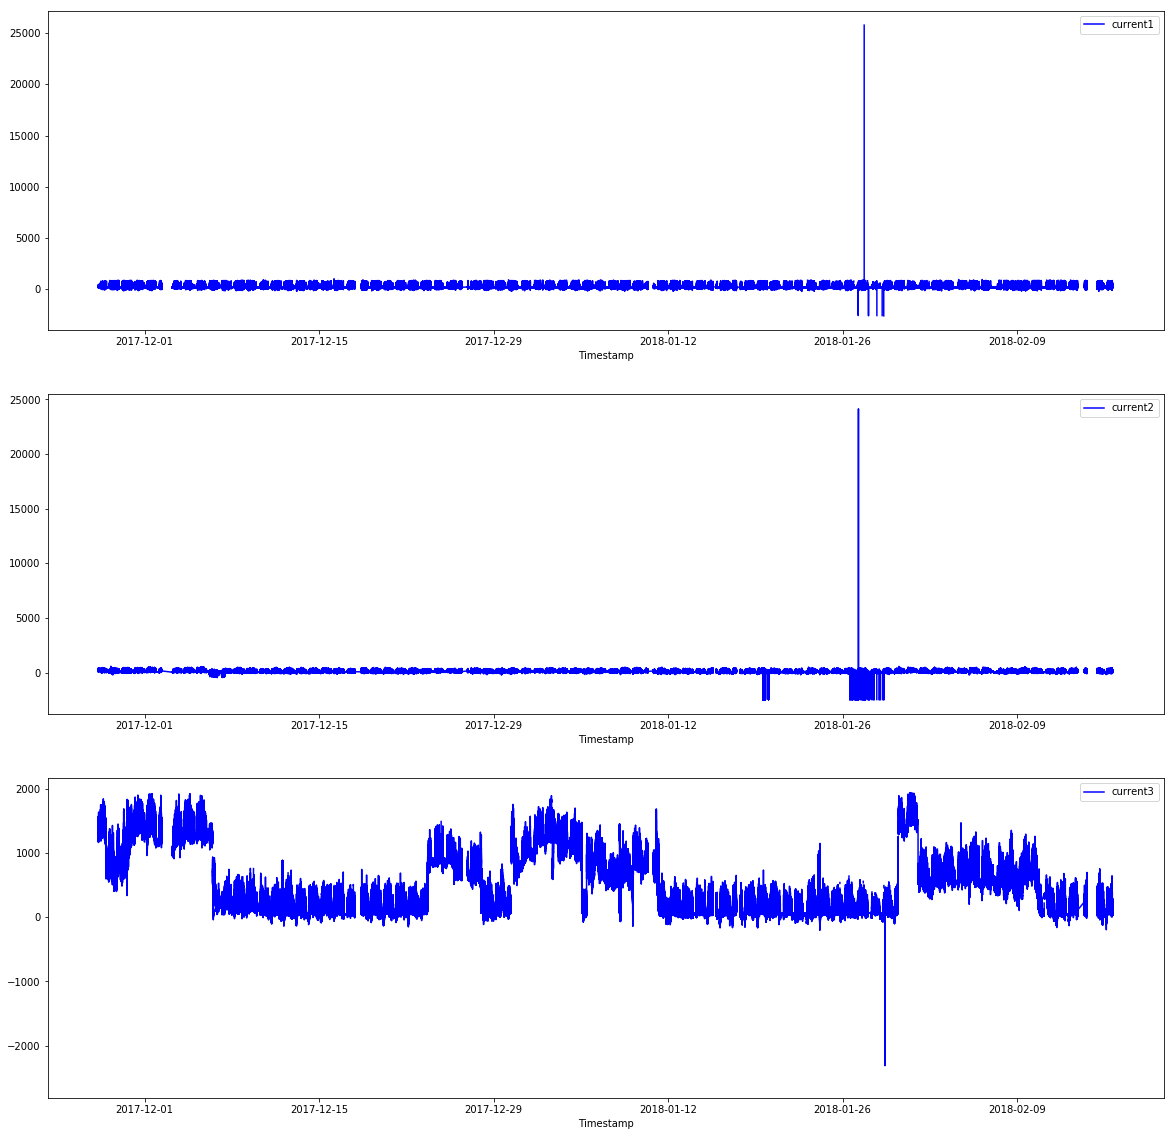

In [60]:
_ = df[["current1", 'current2', 'current3']].plot(subplots=True, layout=(3,1), style=['b','b','b'], 
                                                       figsize=(20,20), x_compat=True, sharex=False) 

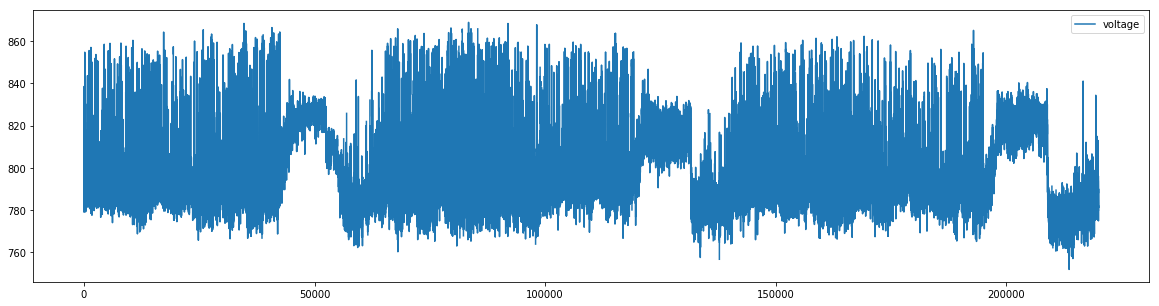

In [20]:
#hourly chart
a = 0
b = 140000+140000
df[a:b][["voltage"]].plot(layout=(3,1), figsize=(20,5), x_compat=True, sharex=False)

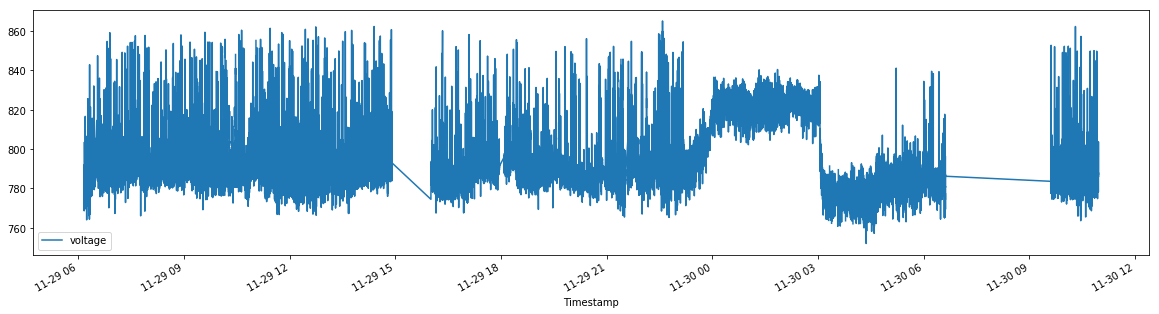

In [26]:
#daily chart
a = 140000
b = a + 86400
df[a:b][["voltage"]].plot(layout=(3,1), figsize=(20,5), x_compat=True, sharex=False)

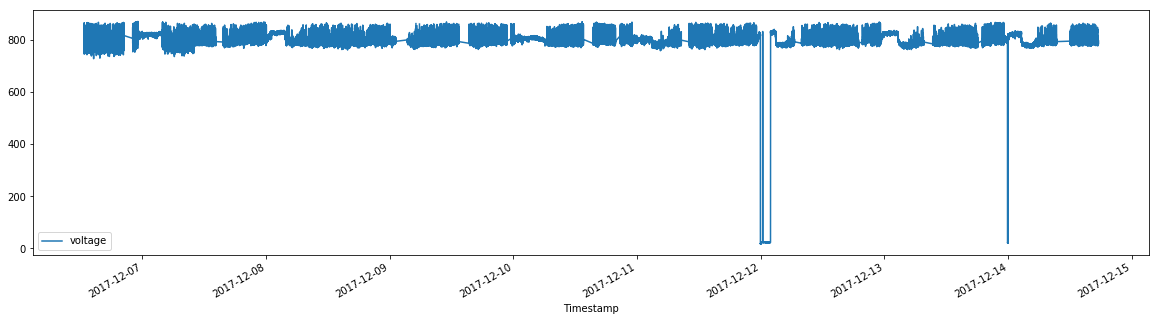

In [13]:
#weekly chart
a = 604800
b = a + 604800
df[a:b][["voltage"]].plot(layout=(3,1), figsize=(20,5), x_compat=True, sharex=False)

In [100]:
#df['dayofweek'] = df['dayoftime'].dt.day
#df



In [101]:
df.index

DatetimeIndex(['2017-11-27 07:07:54', '2017-11-27 07:07:55',
               '2017-11-27 07:07:56', '2017-11-27 07:07:57',
               '2017-11-27 07:07:58', '2017-11-27 07:07:59',
               '2017-11-27 07:08:00', '2017-11-27 07:08:01',
               '2017-11-27 07:08:02', '2017-11-27 07:08:03',
               ...
               '2017-12-12 12:34:23', '2017-12-12 12:34:24',
               '2017-12-12 12:34:25', '2017-12-12 12:34:26',
               '2017-12-12 12:34:27', '2017-12-12 12:34:28',
               '2017-12-12 12:34:29', '2017-12-12 12:34:30',
               '2017-12-12 12:34:31', '2017-12-12 12:34:32'],
              dtype='datetime64[ns]', name='Timestamp', length=1048575, freq=None)